<a href="https://colab.research.google.com/github/vasanth-1605/nm-vasanth/blob/main/source_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     gender race/ethnicity parental level of education         lunch  \
0    female        group D                some college      standard   
1      male        group D          associate's degree      standard   
2    female        group D                some college  free/reduced   
3      male        group B                some college  free/reduced   
4    female        group D          associate's degree      standard   
..      ...            ...                         ...           ...   
995    male        group C                some college      standard   
996    male        group C                some college      standard   
997  female        group A                 high school      standard   
998    male        group E                 high school      standard   
999    male        group D                 high school      standard   

    test preparation course  math score  reading score  writing score  
0                 completed          59             70         

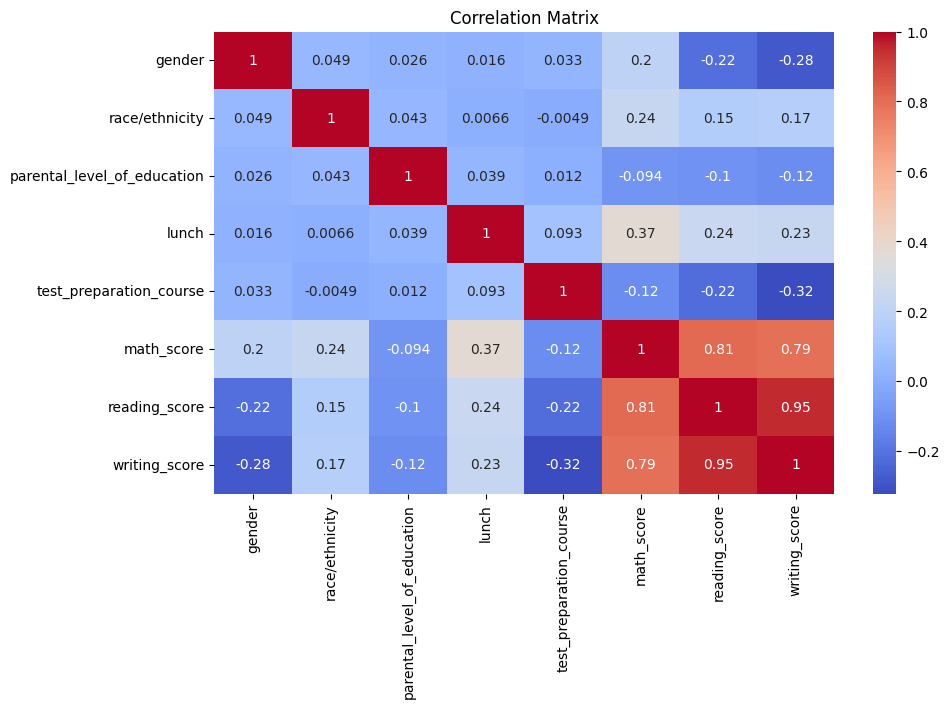

     gender  race/ethnicity  parental_level_of_education  lunch  \
0         0               3                            4      1   
1         1               3                            0      1   
2         0               3                            4      0   
3         1               1                            4      0   
4         0               3                            0      1   
..      ...             ...                          ...    ...   
995       1               2                            4      1   
996       1               2                            4      1   
997       0               0                            2      1   
998       1               4                            2      1   
999       1               3                            2      1   

     test_preparation_course  math_score  reading_score  writing_score  \
0                          0          59             70             78   
1                          1          96       

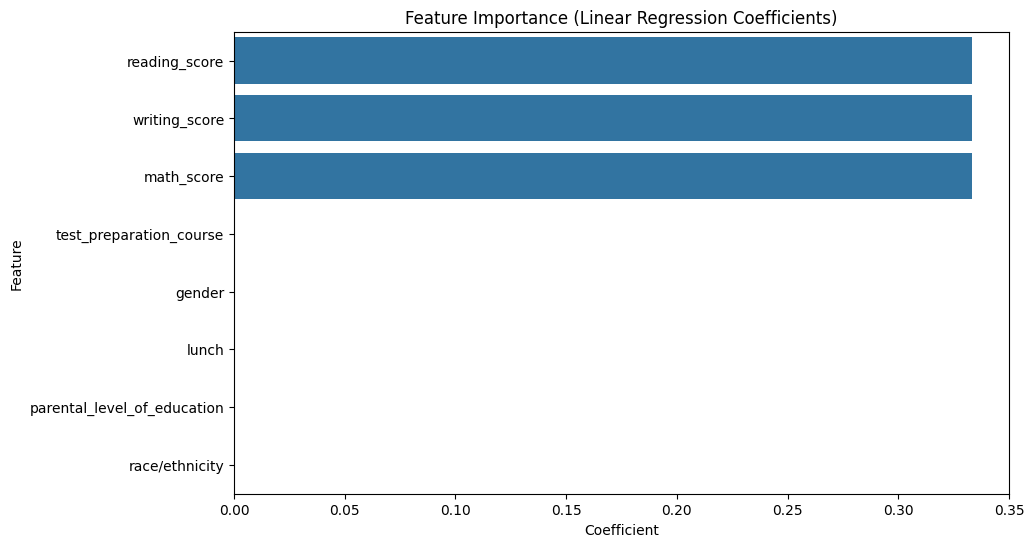

     gender  race/ethnicity  parental_level_of_education  lunch  \
0         0               3                            4      1   
1         1               3                            0      1   
2         0               3                            4      0   
3         1               1                            4      0   
4         0               3                            0      1   
..      ...             ...                          ...    ...   
995       1               2                            4      1   
996       1               2                            4      1   
997       0               0                            2      1   
998       1               4                            2      1   
999       1               3                            2      1   

     test_preparation_course  math_score  reading_score  writing_score  \
0                          0          59             70             78   
1                          1          96       

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv("exams.csv")
print(df)


# Data Preprocessing & Cleaning
# Check for missing values
print(df.isnull().sum())

# Rename columns for easier access
df.columns = df.columns.str.replace(" ", "_")

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


# EDA & Feature Engineering
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

# Feature: Average score
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)
print(df)

# Model Development & Evaluation
# Features and target
X = df.drop(['average_score'], axis=1)
y = df['average_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


# Documentation & Visualization
# Coefficients
coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=coeffs, x="Coefficient", y="Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()
print(df)